In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13496215365455974165
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 15960431820725257162
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4985044352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9109311595547134033
physical_device_desc: "device: 0, name: GeForce GTX 1660, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10479665148008384083
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
import numpy as np
import pandas as pd
import random

from tqdm import tqdm

In [3]:
random.seed(42)

In [4]:
version='v1'

In [5]:
train = pd.read_excel('./data/rae_v17_train.xlsx')
val = pd.read_excel('./data/rae_v17_val.xlsx')
test = pd.read_excel('./data/rae_v17_test.xlsx')

In [6]:
train

,Unnamed: 0,abstract,0,1,2,3
0,0,Modbus는 각종 자동화 장비 감시 및 제어에 전 세계적으로 널리 사용되고 있는 ...,1.237585,2.008186,1.651276,3.128366
1,1,고속철도의 출현과 함께 철도는 국내외에서 자주 사용하는 교통수단 중 하나이다. 또한...,0.535180,0.071971,0.841932,0.685688
2,2,마찰력은 일상생활에서 뉴턴 역학을 이해하는데 매우 중요한 힘임에도불구하고 많은 학생...,11.045432,6.944512,7.842990,7.482370
3,3,"현재 진행형인 4차 산업혁명 사회는 기존 사회와는 여러 가지 면에서 구분되며, 그 ...",3.915327,4.413543,3.069937,4.308259
4,4,"최근, 급격한 산업화로 인한 급속한 기후변화가 생태 보전 및 생물 다양성에 부정적인...",4.100452,4.639769,7.940576,4.091141
...,...,...,...,...,...,...
2800,2800,딥러닝에 기반 한 인공지능과 다양한 센서기술의 발전이 빠르게 진행되면서 운전자 없이...,1.641130,4.729570,6.027492,6.899787
2801,2801,본 연구는 콜버그 도덕·윤리교육의 ``정의 공동체 접근법``을 공학윤리교육에 적용하...,2.322318,0.749738,1.464523,0.995229
2802,2802,"인공지능 로봇이 사회적, 정서적 상호작용의 대상으로서 사람들의 일상적 공간 안으로 ...",0.933682,1.643395,1.009095,1.121973
2803,2803,인공지능 로봇과 연관된 기술의 발전 속도가 빨라짐에 따라 기존에 인간에 의해서만 이...,1.701093,3.295210,1.718543,4.758762


In [7]:
val

,Unnamed: 0,abstract,0,1,2,3
0,0,로지스틱 회귀분석은 통계학 등의 분야에서 예측을 위한 기술 혹은 변수 간의 상관관계...,2.311226,1.456479,2.298644,1.843304
1,1,"최근에 이르러, 기계학습 및 데이터마이닝은 수많은 질병 예측 및 진단에 활용되고 있...",1.646191,1.996787,4.596471,0.000000
2,2,가상발전소 시장에 전력을 안정적으로 공급하기 위해서는 발전량에 대한 정확한 예측이 ...,0.117179,0.159195,1.582059,0.915652
3,3,문서 자동 요약은 주어진 문서로부터 주요 내용을 추출하거나 생성하는 방식으로 축약하...,0.117909,0.208360,1.340475,0.683269
4,4,최근 소프트웨어와 인공지능 교육이 점차 중요하게 다루어지면서 2019년 12월 과학...,4.569798,3.530068,2.915969,5.492957
...,...,...,...,...,...,...
930,930,인간의 특성과 관련된 측정 항목을 나타내는 생체정보는 도난이나 분실의 염려가 없으므...,1.228936,0.737807,1.940096,4.251618
931,931,제4차 산업혁명이 도래하면서 인공지능 로봇은 다양한 영화 및 드라마에서 다른 캐릭터...,1.701094,3.295210,1.718543,4.758762
932,932,초등학교 소프트웨어 교육에서는 간단한 문제해결 과정을 통하여 프로그래밍 과정을 경험...,0.793680,1.689059,0.229706,0.519041
933,933,사물인터넷(IoT) 제품 등의 보안이 허술해 각종 해킹 사고가 발생하고 있다. 보안...,0.325306,3.757606,5.960067,0.750967


In [8]:
test

,Unnamed: 0,abstract,0,1,2,3
0,0,인류는 1800년대 1차 산업혁명을 거치면서 급격하게 변화하고 성장하였다. 약 20...,2.704093,8.809292,9.884574,7.197733
1,1,본 연구는 Deep Neural Network(DNN)을 이용하여 광주-기아 챔피언...,6.213107,2.623662,4.164218,0.464886
2,2,오늘날 기업이 급변하는 글로벌 경영 환경에 민첩하게 대응하기 위해서는 기업 구성원 ...,2.734857,1.507144,1.873411,2.756508
3,3,도시에서 홍수 피해를 방지하기 위한 침수를 예측하기 위해 본 논문에서는 딥러닝(De...,1.228936,0.737808,1.940097,4.251619
4,4,"컴퓨터가 실생활에서 많이 사용됨에 따라, 악성코드(malware)를 만들어 악의적인...",1.032983,0.000000,2.069249,1.546211
...,...,...,...,...,...,...
930,930,포스트 휴머니즘의 한 갈래로서 트랜스 휴머니즘은 ‘의지적 진화’에 의한 인간의 개선...,3.642006,2.489532,0.381377,2.429291
931,931,4차 산업혁명 진전되는 인공지능 시대 노동법제 논의가 필요한 과제는 다음과 같다.첫...,6.362803,7.149104,6.364623,7.359859
932,932,본 연구는 현대 패션쇼에 나타난 포스트휴먼의 내적 특성에 관한 연구이다. 연구의 목...,4.961435,4.227638,1.423454,3.006711
933,933,제4차 산업혁명이라는 유행어가 잘 보여주는 것처럼 현대 과학기술은 사회구조 및 사고...,2.194763,1.988368,1.496768,1.338050


In [9]:
train_X = train['abstract']
train_X

0       Modbus는 각종 자동화 장비 감시 및 제어에 전 세계적으로 널리 사용되고 있는 ...
1       고속철도의 출현과 함께 철도는 국내외에서 자주 사용하는 교통수단 중 하나이다. 또한...
2       마찰력은 일상생활에서 뉴턴 역학을 이해하는데 매우 중요한 힘임에도불구하고 많은 학생...
3       현재 진행형인 4차 산업혁명 사회는 기존 사회와는 여러 가지 면에서 구분되며, 그 ...
4       최근, 급격한 산업화로 인한 급속한 기후변화가 생태 보전 및 생물 다양성에 부정적인...
                              ...                        
2800    딥러닝에 기반 한 인공지능과 다양한 센서기술의 발전이 빠르게 진행되면서 운전자 없이...
2801    본 연구는 콜버그 도덕·윤리교육의 ``정의 공동체 접근법``을 공학윤리교육에 적용하...
2802    인공지능 로봇이 사회적, 정서적 상호작용의 대상으로서 사람들의 일상적 공간 안으로 ...
2803    인공지능 로봇과 연관된 기술의 발전 속도가 빨라짐에 따라 기존에 인간에 의해서만 이...
2804    현재 전세계 배터리 시장은 이차전지 개발에 박차를 가하고 있는 실정이지만, 실제로 ...
Name: abstract, Length: 2805, dtype: object

In [10]:
train_y = train.drop(['Unnamed: 0', 'abstract'], axis=1)
train_y

,0,1,2,3
0,1.237585,2.008186,1.651276,3.128366
1,0.535180,0.071971,0.841932,0.685688
2,11.045432,6.944512,7.842990,7.482370
3,3.915327,4.413543,3.069937,4.308259
4,4.100452,4.639769,7.940576,4.091141
...,...,...,...,...
2800,1.641130,4.729570,6.027492,6.899787
2801,2.322318,0.749738,1.464523,0.995229
2802,0.933682,1.643395,1.009095,1.121973
2803,1.701093,3.295210,1.718543,4.758762


In [11]:
val_X = val['abstract']
val_X

0      로지스틱 회귀분석은 통계학 등의 분야에서 예측을 위한 기술 혹은 변수 간의 상관관계...
1      최근에 이르러, 기계학습 및 데이터마이닝은 수많은 질병 예측 및 진단에 활용되고 있...
2      가상발전소 시장에 전력을 안정적으로 공급하기 위해서는 발전량에 대한 정확한 예측이 ...
3      문서 자동 요약은 주어진 문서로부터 주요 내용을 추출하거나 생성하는 방식으로 축약하...
4      최근 소프트웨어와 인공지능 교육이 점차 중요하게 다루어지면서 2019년 12월 과학...
                             ...                        
930    인간의 특성과 관련된 측정 항목을 나타내는 생체정보는 도난이나 분실의 염려가 없으므...
931    제4차 산업혁명이 도래하면서 인공지능 로봇은 다양한 영화 및 드라마에서 다른 캐릭터...
932    초등학교 소프트웨어 교육에서는 간단한 문제해결 과정을 통하여 프로그래밍 과정을 경험...
933    사물인터넷(IoT) 제품 등의 보안이 허술해 각종 해킹 사고가 발생하고 있다. 보안...
934    이 글은 북한의 4차 산업혁명에 대한 대응전략과 추진방식, 그리고 일부 성과들을  ...
Name: abstract, Length: 935, dtype: object

In [12]:
val_y = val.drop(['Unnamed: 0', 'abstract'], axis=1)
val_y

,0,1,2,3
0,2.311226,1.456479,2.298644,1.843304
1,1.646191,1.996787,4.596471,0.000000
2,0.117179,0.159195,1.582059,0.915652
3,0.117909,0.208360,1.340475,0.683269
4,4.569798,3.530068,2.915969,5.492957
...,...,...,...,...
930,1.228936,0.737807,1.940096,4.251618
931,1.701094,3.295210,1.718543,4.758762
932,0.793680,1.689059,0.229706,0.519041
933,0.325306,3.757606,5.960067,0.750967


In [13]:
test_X = test['abstract']
test_X

0      인류는 1800년대 1차 산업혁명을 거치면서 급격하게 변화하고 성장하였다. 약 20...
1      본 연구는 Deep Neural Network(DNN)을 이용하여 광주-기아 챔피언...
2      오늘날 기업이 급변하는 글로벌 경영 환경에 민첩하게 대응하기 위해서는 기업 구성원 ...
3      도시에서 홍수 피해를 방지하기 위한 침수를 예측하기 위해 본 논문에서는 딥러닝(De...
4      컴퓨터가 실생활에서 많이 사용됨에 따라, 악성코드(malware)를 만들어 악의적인...
                             ...                        
930    포스트 휴머니즘의 한 갈래로서 트랜스 휴머니즘은 ‘의지적 진화’에 의한 인간의 개선...
931    4차 산업혁명 진전되는 인공지능 시대 노동법제 논의가 필요한 과제는 다음과 같다.첫...
932    본 연구는 현대 패션쇼에 나타난 포스트휴먼의 내적 특성에 관한 연구이다. 연구의 목...
933    제4차 산업혁명이라는 유행어가 잘 보여주는 것처럼 현대 과학기술은 사회구조 및 사고...
934    (연구배경 및 목적) 생활 방식 변화로 1인 가구의 증가율은 전 연령대에서 지속해서...
Name: abstract, Length: 935, dtype: object

In [14]:
test_y = test.drop(['Unnamed: 0', 'abstract'], axis=1)
test_y

,0,1,2,3
0,2.704093,8.809292,9.884574,7.197733
1,6.213107,2.623662,4.164218,0.464886
2,2.734857,1.507144,1.873411,2.756508
3,1.228936,0.737808,1.940097,4.251619
4,1.032983,0.000000,2.069249,1.546211
...,...,...,...,...
930,3.642006,2.489532,0.381377,2.429291
931,6.362803,7.149104,6.364623,7.359859
932,4.961435,4.227638,1.423454,3.006711
933,2.194763,1.988368,1.496768,1.338050


# 형태소 분석

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import sent_tokenize

import re
from konlpy.tag import Okt

Using TensorFlow backend.


In [16]:
def text_preprocessing(text_list):
    
    hangul = re.compile('[^ ㄱ-ㅣ가-힣0-9]+')
    stopwords = ['을', '를', '이', '가', '은', '는', '의']
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in tqdm(text_list):
        txt = hangul.sub('', text)
        token = tokenizer.morphs(txt)
        token = [t for t in token if t not in stopwords or type(t) != float]
        token_list.append(token)
        
    return token_list

In [17]:
train_sent_token = text_preprocessing(train_X)
val_sent_token = text_preprocessing(val_X)
test_sent_token = text_preprocessing(test_X)

100%|████████████████████████████████████████████████████████████████████████████████| 935/935 [00:29<00:00, 32.17it/s]


In [18]:
val_sent_token[:4]

[['로지',
  '스틱',
  '회귀분석은',
  '통계학',
  '등의',
  '분야에서',
  '예측을',
  '위한',
  '기술',
  '혹은',
  '변수',
  '간의',
  '상관관계',
  '를',
  '설명',
  '하기',
  '위하여',
  '오랫동안',
  '사용',
  '되어',
  '왔다',
  '이러한',
  '로지',
  '스틱',
  '회귀분석',
  '방법에서',
  '현재',
  '각',
  '속성',
  '들',
  '은',
  '목적',
  '값에',
  '대하여',
  '동일한',
  '중요도를',
  '가지고',
  '있다',
  '본',
  '연구에서는',
  '이러한',
  '가중치',
  '계산',
  '을',
  '좀더',
  '세분화',
  '하여',
  '각',
  '속성',
  '의',
  '값이',
  '서로',
  '다른',
  '중요도를',
  '가지는',
  '새로운',
  '학습',
  '방법을',
  '제시',
  '한다',
  '알고리즘의',
  '성능을',
  '최대',
  '화하는',
  '각',
  '속성',
  '값',
  '가중치',
  '의',
  '값을',
  '계산',
  '하기',
  '위하여',
  '점진적',
  '하강법을',
  '이용하여',
  '개발',
  '하였다',
  '본',
  '연구에서',
  '제안된',
  '방법은',
  '다양한',
  '데이터를',
  '이용하여',
  '실험',
  '하였고',
  '속성',
  '값',
  '기반',
  '로지',
  '스틱',
  '회귀분석',
  '방법은',
  '기존의',
  '로지',
  '스틱',
  '회귀분석',
  '보다',
  '우수한',
  '학습',
  '능력을',
  '보임을',
  '알',
  '수',
  '있었다'],
 ['최근에',
  '이르러',
  '기계학습',
  '및',
  '데이터마이닝',
  '은',
  '수많은',
  '질병',
  '예측',
  '및',
  '진단에',
  '활용

# 문장과 단어 개수 확인

### train + val data

In [19]:
sent_token = list(train_X) + list(val_X)

In [20]:
word_len = []

for sentences in tqdm(sent_token):
    for sentence in sentences.split('. '):
        word_len.append(sentence.split(' '))

100%|████████████████████████████████████████████████████████████████████████████| 3740/3740 [00:00<00:00, 5316.13it/s]


In [21]:
word_len[1]

['그러므로',
 '선박,',
 '빌딩,',
 '기차,',
 '비행기',
 '등',
 'Modbus를',
 '이용하는',
 '모든',
 '장비들과',
 '연결이',
 '가능하여',
 '환경변수의',
 '측정',
 '및',
 '원격제어가',
 '가능하게',
 '된다']

In [22]:
sentence_num = []

for sentences in tqdm(sent_token):
    sentence_num.append(sentences.split('. '))

100%|████████████████████████████████████████████████████████████████████████████| 3740/3740 [00:00<00:00, 8801.56it/s]


In [23]:
sentence_num[0]

['Modbus는 각종 자동화 장비 감시 및 제어에 전 세계적으로 널리 사용되고 있는 자발적 산업표준 통신 프로토콜이다',
 '그러므로 선박, 빌딩, 기차, 비행기 등 Modbus를 이용하는 모든 장비들과 연결이 가능하여 환경변수의 측정 및 원격제어가 가능하게 된다',
 '본 논문에서 는 퍼지제어 시스템을 이용하여 외부환경요인을 각각 조합한 불확실한 내용을 정량적인 값으로 변환하여 LED 조명으로 표현하기 위해 알고 리즘을 설계하고, 설계한 알고리즘에 Modbus 통신 프로토콜을 추가하여 선박의 통합관리 시스템에서 외부환경요인 확인 및 원격제어가 가능 한 감성조명용 LED 제어기 회로를 설계 및 구현 하였다',
 '외부환경요소인 온도, 습도, 조도 값을 센서를 통해 제어기로 받아들이고 이 값들을 퍼지제어 알고리즘을 통해 LED로 표현된다',
 'Modbus는 Serial 통신으로 RS485를 이용하여 다른 기기와 연결 되어 온도, 습도, 조도 상태 및 LED 출력 값 확인이 가능하고 또한 사용자가 원격으로 RGB 값을 변경 할 수 있기 때문에 원하는 색으로 변경이 가능하게 된다',
 '제작한 제 어기로 온도, 습도, 조도에 따라 LED 조명색상이 변화 되는 것을 확인 하였다.']

In [24]:
print('문서 내의 최대 문장 개수: ', max([len(i) for i in sentence_num]))
print('문서 내의 최소 문장 개수: ', min([len(i) for i in sentence_num]))
print('문서 내의 평균 문장 개수 :', sum(map(len, sentence_num))/len(sentence_num))
print('문서 내의 문장 개수 중앙값 :', np.median([len(i) for i in sentence_num]))

문서 내의 최대 문장 개수:  34
문서 내의 최소 문장 개수:  5
문서 내의 평균 문장 개수 : 7.831550802139038
문서 내의 문장 개수 중앙값 : 7.0


In [25]:
print('문장 내의 최대 단어 개수: ', max([len(j) for j in word_len]))
print('문장 내의 최소 단어 개수: ', min([len(j) for j in word_len]))
print('문장 내의 평균 단어 개수 :', sum(map(len, word_len))/len(word_len))
print('문장 내의 단어 개수 중앙값 :', np.median([len(j) for j in word_len]))

문장 내의 최대 단어 개수:  391
문장 내의 최소 단어 개수:  1
문장 내의 평균 단어 개수 : 19.31136906794128
문장 내의 단어 개수 중앙값 : 18.0


In [26]:
MAX_SENTENCES = 20
MAX_SENTENCE_LENGTH = 200

# 데이터셋 구성

In [27]:
train_val_sent_token = train_sent_token + val_sent_token

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_val_sent_token)


max_nb_words = len(tokenizer.word_index) + 1

def doc2hierarchical(text, max_sentences = MAX_SENTENCES, max_sentence_length = MAX_SENTENCE_LENGTH):
    sentences = text.split('. ')
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen = max_sentence_length)

    pad_size = max_sentences - tokenized_sentences.shape[0]

    if pad_size <= 0:  # tokenized_sentences.shape[0] < max_sentences
        tokenized_sentences = tokenized_sentences[:max_sentences]
    else:
        tokenized_sentences = np.pad(tokenized_sentences, ((0, pad_size), (0, 0)), mode='constant', constant_values=0)
    
    return tokenized_sentences
            
def build_dataset(x_data, y_data, max_sentences = MAX_SENTENCES, max_sentence_length = MAX_SENTENCE_LENGTH, tokenizer = tokenizer):
    nb_instances = len(x_data)
    X_data = np.zeros((nb_instances, max_sentences, max_sentence_length), dtype='int32')
    for i, review in enumerate(x_data):
        tokenized_sentences = doc2hierarchical(review)
            
        X_data[i] = tokenized_sentences[None, ...]
        
    nb_classes = y_data
    Y_data = nb_classes #to_categorical(y_data, nb_classes)
    
    return X_data, Y_data


train_X_data, train_Y_data = build_dataset(train_X, train_y)
val_X_data, val_Y_data = build_dataset(val_X, val_y)
test_X_data, test_Y_data = build_dataset(test_X, test_y)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("train_Y_data.shape: {}".format(train_Y_data.shape))
print("val_X_data.shape: {}".format(val_X_data.shape))
print("val_Y_data.shape: {}".format(val_Y_data.shape))
print("test_X_data.shape: {}".format(test_X_data.shape))
print("test_Y_data.shape: {}".format(test_Y_data.shape))

train_X_data.shape: (2805, 20, 200)
train_Y_data.shape: (2805, 4)
val_X_data.shape: (935, 20, 200)
val_Y_data.shape: (935, 4)
test_X_data.shape: (935, 20, 200)
test_Y_data.shape: (935, 4)


In [29]:
tokenizer.word_index

{'의': 1,
 '을': 2,
 '에': 3,
 '이': 4,
 '수': 5,
 '있다': 6,
 '하였다': 7,
 '를': 8,
 '한다': 9,
 '하고': 10,
 '할': 11,
 '본': 12,
 '대한': 13,
 '과': 14,
 '적': 15,
 '및': 16,
 '는': 17,
 '하는': 18,
 '있는': 19,
 '한': 20,
 '은': 21,
 '가': 22,
 '으로': 23,
 '것이': 24,
 '와': 25,
 '위해': 26,
 '통해': 27,
 '된': 28,
 '인': 29,
 '위한': 30,
 '로': 31,
 '인공지능': 32,
 '분석': 33,
 '하기': 34,
 '다': 35,
 '학습': 36,
 '들': 37,
 '이다': 38,
 '연구': 39,
 '에서': 40,
 '그': 41,
 '활용': 42,
 '이러한': 43,
 '다양한': 44,
 '이를': 45,
 '4': 46,
 '하여': 47,
 '것으로': 48,
 '교육': 49,
 '연구는': 50,
 '기술': 51,
 '고': 52,
 '제안': 53,
 '될': 54,
 '차': 55,
 '적용': 56,
 '또한': 57,
 '데이터': 58,
 '개발': 59,
 '사용': 60,
 '결과': 61,
 '된다': 62,
 '새로운': 63,
 '산업혁명': 64,
 '따라': 65,
 '예측': 66,
 '되고': 67,
 '경우': 68,
 '관련': 69,
 '도': 70,
 '되는': 71,
 '스마트': 72,
 '연구에서는': 73,
 '그리고': 74,
 '정보': 75,
 '되었다': 76,
 '기반': 77,
 '대해': 78,
 '인간': 79,
 '제': 80,
 '등': 81,
 '논문에서는': 82,
 '데이터를': 83,
 '영향을': 84,
 '제시': 85,
 '같은': 86,
 '최근': 87,
 '이에': 88,
 '3': 89,
 '분류': 90,
 '따라서': 91,
 '해': 92,
 '가장

In [30]:
word_index = tokenizer.word_index
print('Total %s unique tokens.' % len(word_index))

Total 41225 unique tokens.


## Embedding model

In [31]:
from gensim.models import Word2Vec
from keras.layers import Embedding

In [33]:
model = Word2Vec.load('./data/embedding/word2vec_okt.model')

In [34]:
word_vectors = model.wv
word_vectors

In [35]:
embed_size = 100

In [36]:
def get_vector(word):
    if word in word_vectors:
        return word_vectors[word]
    else:
        return None

In [37]:
embedding_matrix = np.zeros((len(word_index) + 1, embed_size))
absent_words = 0
for word, i in word_index.items():
    tmp = get_vector(word)
    if tmp is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = tmp
    else:
        absent_words += 1
print('Total absent words are', absent_words, 'which is', "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

Total absent words are 7 which is 0.02 % of total words


# Hierarchical Attention Network

In [38]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import Bidirectional, TimeDistributed, LSTM, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Dropout
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [39]:
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'W_regularizer': self.W_regularizer,
            'u_regularizer': self.u_regularizer,
            'b_regularizer': self.b_regularizer,
            'W_constraint': self.W_constraint,
            'u_constraint': self.u_constraint,
            'b_constraint': self.b_constraint,
            'bias': self.bias
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [40]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

In [41]:
EMBEDDING_DIM = 100

REG_PARAM = 1e-13
l2_reg = regularizers.l2(REG_PARAM)

In [42]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights = [embedding_matrix],
                            input_length = MAX_SENTENCE_LENGTH,
                            trainable = False)

In [44]:
import time

In [45]:
start = time.time()

with tf.device('/gpu:0'):
    # first, build a sentence encoder
    word_input = Input(shape=(MAX_SENTENCE_LENGTH,), dtype='float32')
    word_sequences = embedding_layer(word_input)
    word_lstm = Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=l2_reg))(word_sequences)
    word_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(word_lstm)
    word_att = AttentionWithContext()(word_dense)
    wordEncoder = Model(word_input, word_att)

    # then, build a document encoder
    sent_input = Input(shape=(MAX_SENTENCES, MAX_SENTENCE_LENGTH), dtype='float32')
    sent_encoder = TimeDistributed(wordEncoder)(sent_input)
    sent_lstm = Bidirectional(LSTM(100, return_sequences=True, kernel_regularizer=l2_reg))(sent_encoder)
    sent_dense = TimeDistributed(Dense(200, kernel_regularizer=l2_reg))(sent_lstm)
    sent_att = AttentionWithContext()(sent_dense)

    # finally, add fc layers for classification
    hidden = BatchNormalization()(sent_att)
    hidden = Dense(100, activation='relu')(hidden)
    hidden = Dropout(0.2)(hidden)
    hidden = Dense(50, activation='relu')(hidden)
    preds = Dense(4)(hidden)
    
    model = Model(inputs=[sent_input], outputs=[preds])

    
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(loss=['mse'], optimizer=optimizer)


    es = EarlyStopping(monitor='val_loss', patience=5)
    model_path = './save_models/han_rae_ls4_{}'.format(version) + '_{epoch:02d}_{val_loss:.5f}.h5'
    mc = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, mode='auto')

       
    history = model.fit(x=[train_X_data], y=[train_Y_data], batch_size=32, epochs=30,
                        verbose=True, validation_data=(val_X_data, val_Y_data), callbacks=[es, mc])
    
print("time :", time.time() - start)

Train on 2805 samples, validate on 935 samples
Epoch 1/30
2805/2805 [==============================] - 84s 30ms/step - loss: 5.8284 - val_loss: 7.4491

Epoch 00001: saving model to ./save_models/han_rae_ls4_v1_01_7.44908.h5
Epoch 2/30
2805/2805 [==============================] - 83s 29ms/step - loss: 4.6391 - val_loss: 6.5560

Epoch 00002: saving model to ./save_models/han_rae_ls4_v1_02_6.55604.h5
Epoch 3/30
2805/2805 [==============================] - 83s 30ms/step - loss: 4.1002 - val_loss: 6.0492

Epoch 00003: saving model to ./save_models/han_rae_ls4_v1_03_6.04920.h5
Epoch 4/30
2805/2805 [==============================] - 83s 29ms/step - loss: 3.6730 - val_loss: 4.3109

Epoch 00004: saving model to ./save_models/han_rae_ls4_v1_04_4.31085.h5
Epoch 5/30
2805/2805 [==============================] - 83s 30ms/step - loss: 3.3297 - val_loss: 4.8707

Epoch 00005: saving model to ./save_models/han_rae_ls4_v1_05_4.87075.h5
Epoch 6/30
2805/2805 [==============================] - 83s 30ms/ste

KeyboardInterrupt: 

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 20, 200)           0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 20, 200)           4364000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 200)           240800    
_________________________________________________________________
time_distributed_3 (TimeDist (None, 20, 200)           40200     
_________________________________________________________________
attention_with_context_2 (At (None, 200)               40400     
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2010

In [47]:
import matplotlib.pyplot as plt

In [48]:
history.history.keys()

NameError: name 'history' is not defined

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

# Inference

In [30]:
import keras
import tensorflow as tf
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints

from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import Bidirectional, TimeDistributed, LSTM, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization, Dropout
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
class AttentionWithContext(Layer):
    """
    Attention operation, with a context/query vector, for temporal data.
    Supports Masking.
    Follows the work of Yang et al. [https://www.cs.cmu.edu/~diyiy/docs/naacl16.pdf]
    "Hierarchical Attention Networks for Document Classification"
    by using a context vector to assist the attention
    # Input shape
        3D tensor with shape: `(samples, steps, features)`.
    # Output shape
        2D tensor with shape: `(samples, features)`.
    How to use:
    Just put it on top of an RNN Layer (GRU/LSTM/SimpleRNN) with return_sequences=True.
    The dimensions are inferred based on the output shape of the RNN.
    Note: The layer has been tested with Keras 2.0.6
    Example:
        model.add(LSTM(64, return_sequences=True))
        model.add(AttentionWithContext())
        # next add a Dense layer (for classification/regression) or whatever...
    """

    def __init__(self,
                 W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'W_regularizer': self.W_regularizer,
            'u_regularizer': self.u_regularizer,
            'b_regularizer': self.b_regularizer,
            'W_constraint': self.W_constraint,
            'u_constraint': self.u_constraint,
            'b_constraint': self.b_constraint,
            'bias': self.bias
        })
        return config

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        # do not pass the mask to the next layers
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        # apply mask after the exp. will be re-normalized next
        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            a *= K.cast(mask, K.floatx())

        # in some cases especially in the early stages of training the sum may be almost zero
        # and this results in NaN's. A workaround is to add a very small positive number ε to the sum.
        # a /= K.cast(K.sum(a, axis=1, keepdims=True), K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

In [32]:
def dot_product(x, kernel):
    """
    Wrapper for dot product operation, in order to be compatibl|e with both
    Theano and Tensorflow
    Args:
        x (): input
        kernel (): weights
    Returns:
    """
    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

In [50]:
from keras.utils import CustomObjectScope
from keras.models import load_model

## HAN load

In [136]:
with CustomObjectScope({'AttentionWithContext': AttentionWithContext}):
    model = load_model('./save_models/best_models/han_rae_ls4_v1_13_4.03284.h5')

In [137]:
model.evaluate(test_X_data, test_Y_data, batch_size=32)

935/935 [==============================] - 4s 4ms/step


4.115314767959921

In [138]:
pred = model.predict(test_X_data, batch_size=32)
pred

array([[1.8459873 , 2.6324384 , 2.0216837 , 1.7911365 ],
       [2.4689155 , 1.7334155 , 3.2179945 , 2.2769032 ],
       [3.386348  , 1.6841891 , 1.6919729 , 2.4997067 ],
       ...,
       [2.3717067 , 2.807764  , 1.5225168 , 2.1571414 ],
       [2.4192858 , 3.632702  , 2.0157661 , 3.4151511 ],
       [0.6125083 , 1.1320395 , 1.2665185 , 0.74803984]], dtype=float32)

## Decoder load

In [139]:
decoder = load_model('./save_models/decoder_models/residual_decoder_v17.h5')

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [140]:
test_decode = decoder.predict(pred)
test_decode

array([[1.5572775e-02, 1.9839330e-04, 9.2188314e-02, ..., 2.4838612e-04,
        7.2793016e-05, 5.6436346e-03],
       [7.4132280e-05, 2.3853459e-06, 3.7414566e-06, ..., 5.9405076e-05,
        9.5612251e-10, 7.4487674e-04],
       [1.5998392e-04, 2.2189079e-07, 2.3711791e-04, ..., 2.0865756e-04,
        1.9511448e-09, 1.2723395e-07],
       ...,
       [2.9906381e-02, 9.8988439e-06, 7.1566470e-02, ..., 2.5679674e-05,
        6.3601352e-04, 7.8002733e-05],
       [3.5010173e-03, 3.6769848e-08, 5.4273009e-01, ..., 5.3627014e-07,
        6.3129970e-05, 3.1685006e-05],
       [9.0681853e-05, 1.3448643e-02, 7.6588853e-03, ..., 1.1669278e-02,
        6.9888003e-08, 1.6479942e-01]], dtype=float32)

In [141]:
import matplotlib.pyplot as plt

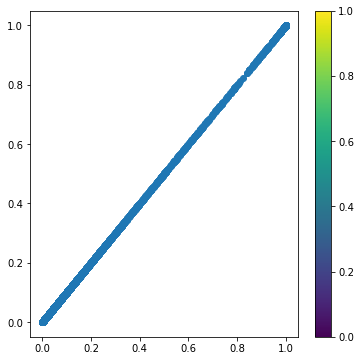

In [142]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [143]:
"""test_predict = test_decode.round()
test_predict"""

'test_predict = test_decode.round()\ntest_predict'

In [144]:
test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [145]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [146]:
#c_matrix.shape

In [147]:
#c_matrix

## Test label load

In [148]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
one_hot_test_labels = np.array(test_X)
print(one_hot_test_labels)
print(one_hot_test_labels.shape)

[[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(935, 262)


In [150]:
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

In [151]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.08342245989304813
precision :  0.4301948051948052
recall :  0.15954244431065623
f1 :  0.23276240667545017
------------------------
hamming_loss :  0.007131485488018941


In [152]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.08342245989304813
precision :  0.264349376114082
recall :  0.16914438502673795
f1 :  0.19231983702571936
------------------------
hamming_loss :  0.007131485488018941


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualization

In [ ]:
# wrong example
attention_extractor = Model(inputs=[document_input],
                            outputs=[word_attention, sentence_attention])
attention_extractor.predict(X_test[:10])

In [ ]:
word_attention_extractor = Model(inputs=[sentence_input],
                                 outputs=[word_attention])

word_attentions = TimeDistributed(word_attention_extractor)(document_input)

attention_extractor = Model(inputs=[document_input],
                            outputs=[word_attentions, sentence_attention])
attention_extractor.predict(X_test[:10])

In [ ]:
word_rev_index = {}
for word, i in tokenizer.word_index.items():
    word_rev_index[i] = word

def sentiment_analysis(review):    
    sentences = sent_tokenize(review)
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen=MAX_SENTENCE_LENGTH)
    pad_size = MAX_SENTENCES - tokenized_sentences.shape[0]

    if pad_size <= 0:
        tokenized_sentences = tokenized_sentences[:MAX_SENTENCES]
    else:
        tokenized_sentences = np.pad(
            tokenized_sentences, ((0, pad_size), (0, 0)),
            mode='constant', constant_values=0
        )
    
    # word attention만 가져오기
    pred_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[0]
    for i, sentence in enumerate(tokenized_sentences[:-pad_size]):
        words = [word_rev_index[word_id] for word_id in sentence if word_id != 0][:50]
        pred_att = np.asarray(pred_attention[0][i][::-1][:len(words)][::-1])
        pred_att = np.expand_dims(pred_att, axis=0)

        fig, ax = plt.subplots(figsize=(len(words), 2))
        plt.rc('xtick', labelsize=22)
        heatmap = sn.heatmap(pred_att, xticklabels=words, square=True, linewidths=0.1)
        plt.xticks(rotation=70)
        plt.show()
        
sentiment_analysis("Delicious healthy food. The steak is amazing. Fish and pork are awesome too. Service is above and beyond. Not a bad thing to say about this place. Worth every penny!")